In [1]:
import pandas as pd
import tweepy
import numpy as np
import cnfg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
round_dict = {1:1,
              2:2,
              4:3,
              8:4,
              16:5,
              32:6,
              64:7}

In [3]:
handles = pd.read_csv("twitter_handles_2016.csv")
tweet_data = pd.read_csv("tweet_data.csv")
tweet_data.username = tweet_data.username.str.lower()

In [4]:
df = handles.merge(tweet_data, how = "left", left_on = "twitter_handle", right_on = "username")
df = df.drop("username", axis = 1)

In [5]:
# Last year I didn't get results for Michigan - dropping them
df = df.dropna()

In [6]:
tweet_features = ['num_favorites', 'num_followers', 'num_friends', 'num_statuses', 'retweet_avg', 'seed']
rank_features = [feature + "_rank" for feature in tweet_features]
all_features = tweet_features + rank_features
for feature in tweet_features:
    df[feature + "_rank"] = df[feature].rank(ascending = False)
df['average_rank'] = df[rank_features].mean(axis = 1)

In [7]:
df['round_reached_linear'] = df.round_reached.map(round_dict)

In [8]:
y = df.round_reached
x = df[all_features]

In [9]:
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)

In [10]:
model = LinearRegression()
model.fit(x, y)
model.score(x, y)

0.46721730432053254

In [11]:
with open('march_madness_2016_model.pickle', 'wb') as filename:
    pickle.dump(model, filename)

In [12]:
coefs = pd.DataFrame.from_dict(dict(zip(all_features, model.predict(df[all_features]))), 
                               orient = 'index')
coefs.columns = ["coefficients"]
coefs.sort_values("coefficients")

,coefficients
num_followers,-1.119890e+06
retweet_avg,-5.913339e+05
seed,-4.880793e+05
num_friends,-4.563045e+05
retweet_avg_rank,-4.273896e+05
num_friends_rank,-3.988776e+05
seed_rank,-3.522837e+05
num_favorites_rank,-2.151888e+05
num_followers_rank,-2.068855e+05
num_favorites,-1.769674e+05


In [13]:
df['prediction'] = model.predict(x)
df['prediction_rank'] = df.prediction.rank()
df = df.sort_values("round_reached")

In [14]:
df.to_csv("march_madness_2017_predictions.csv", index = False)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


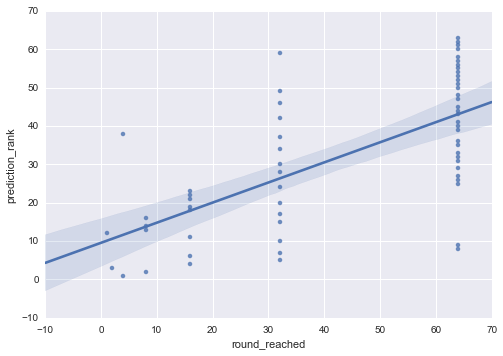

In [16]:
sns.regplot(data = df, x = "round_reached", y = "prediction_rank")

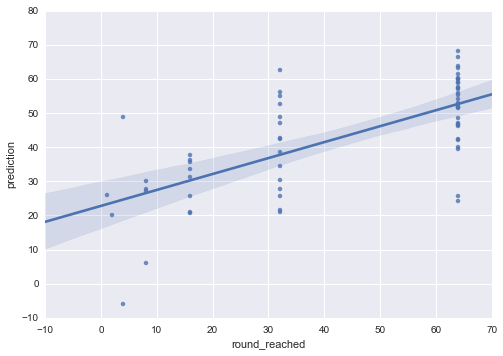

In [17]:
sns.regplot(data = df, x = "round_reached", y = "prediction")

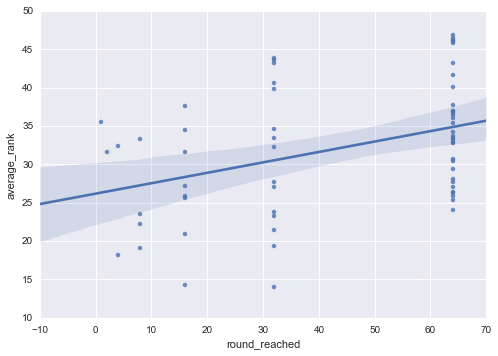

In [18]:
sns.regplot(data = df, x = "round_reached", y = "average_rank")